#Steps in vectorized bacltesting of a simple strategy
1)strategy/idea
2)data
3)Indicators
4)Signals
5)Position
6)Returns
7)Analysis
Simple startegy :
    Buy of the nifty50 if 10 day SMA exceed 20 day SMA and sell vica versa

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import pyfolio as pf


/Users/dmoneksh/opt/anaconda3/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

datetime.date(2023, 2, 20)

datetime.date(2021, 1, 25)

In [39]:
class backtesting_crossover:
    
    def __init__(self,ticker,start_date,end_date,ma_short,ma_long):
        self.ticker=ticker
        self.start_date=start_date
        self.end_date=end_date
        self.ma_short=ma_short
        self.ma_long=ma_long
        
        self.fetch_data()
        self.indicators()
        self.signal()
        self.position()
        self.returns()
    
    def fetch_data(self):
        self.df= yf.download(self.ticker,self.start_date,self.end_date)
    
    def indicators(self):
        self.df['ma_short']= self.df['Adj Close'].rolling(window=self.ma_short,center=False).mean()
        self.df['ma_long']=self.df['Adj Close'].rolling(window=self.ma_long,center=False).mean()
        self.df['ma_short_prev']= self.df['ma_short'].shift(1)
        self.df['ma_long_prev']= self.df['ma_long'].shift(1)
        self.df.dropna(inplace=True)
    
    def signal(self):
        self.df['signal']=np.where((self.df['ma_short']>self.df['ma_long'])&
                                (self.df['ma_short_prev']<self.df['ma_long_prev']),1,0)
        self.df['signal']=np.where((self.df['ma_short']<self.df['ma_long'])&
                                  (self.df['ma_short_prev']>self.df['ma_long_prev']),-1,self.df['signal'])
    
    def position(self):
        self.df['position']=self.df['signal'].replace(to_replace=0,method='ffill')
    
    def returns(self):
        self.df['bnh_returns']=np.log(self.df['Adj Close']/self.df['Adj Close'].shift(1))
        self.df['strategy_return']=self.df['bnh_returns']*self.df['position'].shift(1)
        print('Total return:',self.df['strategy_return'].cumsum()[-1])
        return self.df['strategy_return'].cumsum()[-1]
    
    def analysis(self):
        self.df[['ma_short','ma_long','position']].plot(figsize=(15,6),secondary_y='position',grid=True)
        plt.title('checking if positions are generated properly')
        plt.show()
        
        self.df[['bnh_returns','strategy_return']].cumsum().plot(figsize=(15,6),secondary_y='position',grid=True)
        plt.title('Buy & hold vs crossover strategy' 'cumulative returns')
        plt.show()
        
        pf.create_simple_tear_sheet(self.df['strategy_return'])
    

In [42]:
end1=dt.datetime.now().date()
start1= end1-pd.Timedelta(days=6*252)
end1
start1

datetime.date(2023, 2, 20)

datetime.date(2018, 12, 31)

In [43]:
nifty_10_20=backtesting_crossover('^NSEI',start1,end1,15,30)

[*********************100%***********************]  1 of 1 completed
Total return: 0.4481449315228681


In [44]:
ibm_15_30=backtesting_crossover('IBM',start1,end1,5,10)

[*********************100%***********************]  1 of 1 completed
Total return: -0.1391593076323982


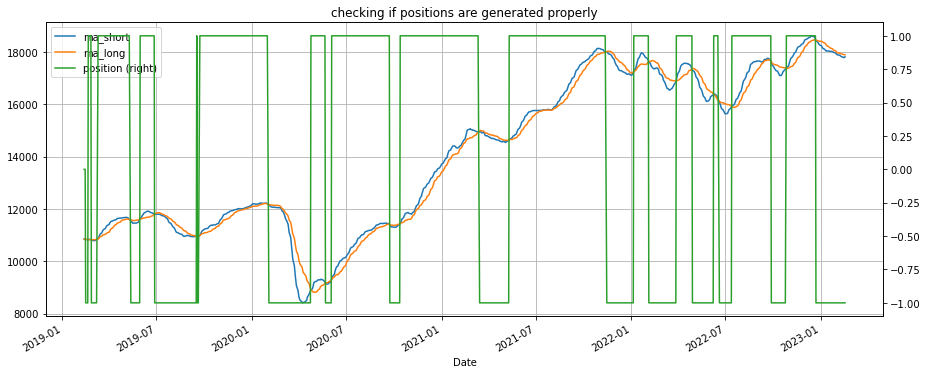

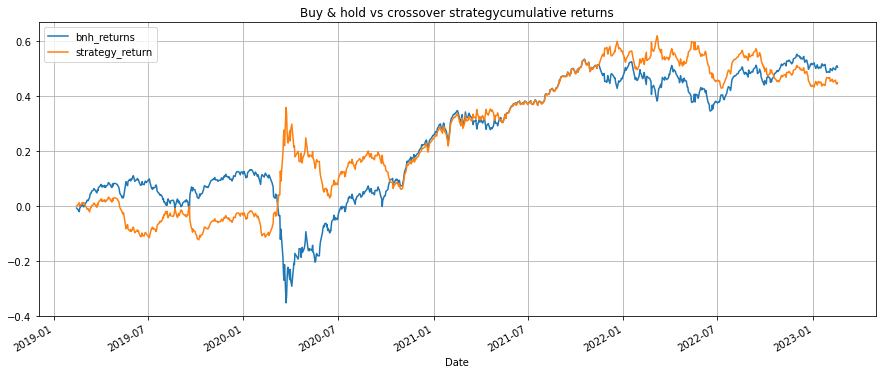

/Users/dmoneksh/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2019-02-12
End date,2023-02-17
Total months,47
,Backtest
Annual return,9.7%
Cumulative returns,43.7%
Annual volatility,20.9%
Sharpe ratio,0.54
Calmar ratio,0.33
Stability,0.83
Max drawdown,-29.4%


/Users/dmoneksh/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


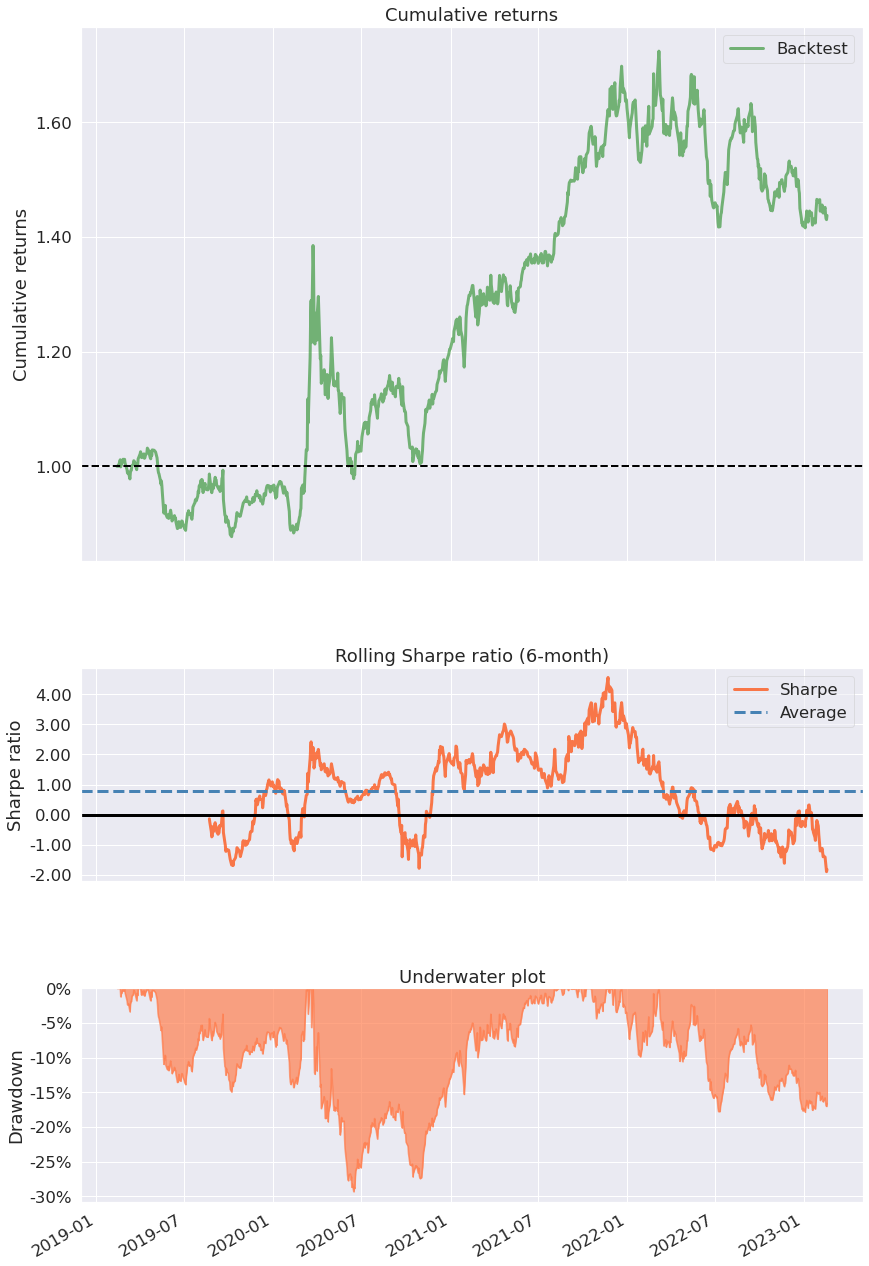

In [45]:
nifty_10_20.analysis()

In [46]:
IT_5_20 = backtesting_crossover('^CNXIT', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.9401672655242492


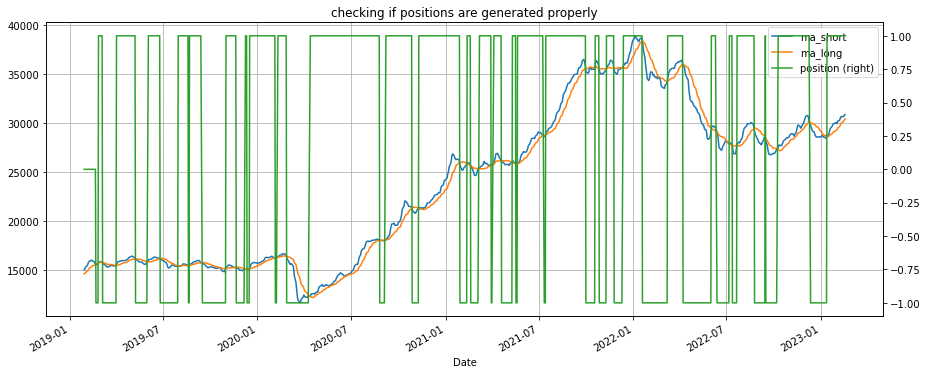

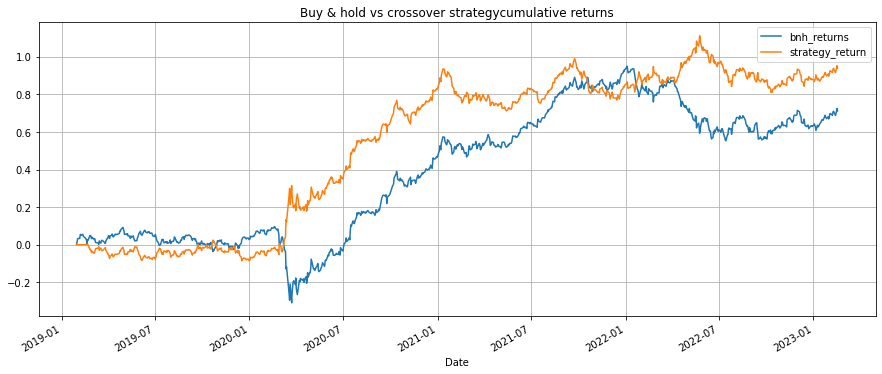

/Users/dmoneksh/opt/anaconda3/lib/python3.9/site-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2019-01-29
End date,2023-02-17
Total months,47
,Backtest
Annual return,23.1%
Cumulative returns,127.9%
Annual volatility,24.3%
Sharpe ratio,0.98
Calmar ratio,0.86
Stability,0.80
Max drawdown,-27.0%


/Users/dmoneksh/opt/anaconda3/lib/python3.9/site-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


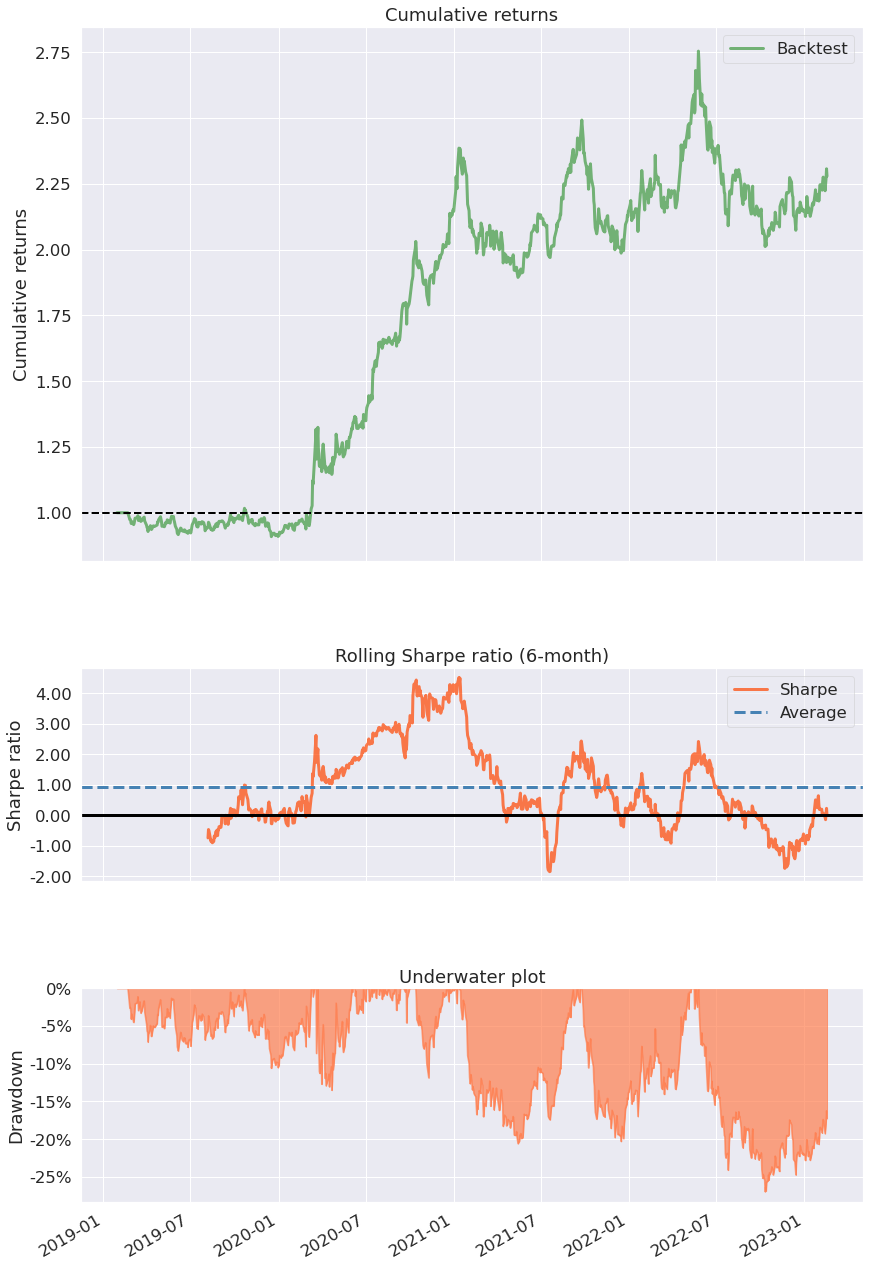

In [47]:
IT_5_20.analysis()

In [49]:
class backtesting_ema_crossover(backtesting_crossover):
    
    def indicator(self):
        self.df['ma_short']=self.df['Adj Close'].ewm(span=self.ma_short,adjust=False).mean()
        self.df['ma_long']=self.df['Adj Close'].ewm(span=self.ma_long,adjust=False).mean()
        self.df['ma_short_prev']=self.df['ma_short'].shift()
        self.df['ma_long_prev']=self.df['ma_long'].shift()
        self.df.dropna(inplace=True)
        
    @staticmethod
    def date_of_backtesting():
        print("Date of backtesting",dt.datetime.now().date())
    
    @classmethod
    def about_this_backtest(cls):
        print('Strategy type:short long  EMA crossover strategy.')

In [50]:
it_5_20=backtesting_ema_crossover('^CNXIT', start1, end1, 5, 20)

[*********************100%***********************]  1 of 1 completed
Total return: 0.9401672655242492
